## Import packages and data

https://github.com/calbal91/project-understanding-elections \
Some of the code is adapted and taken from the above GitHub Respository

In [1]:
#For data manipulation
import numpy as np
import pandas as pd
import json
import math

#For data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams

#For data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#For clustering analysis
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#For evaluating clusters
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, ward

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save things
import pickle

In [2]:
df = pd.read_csv('data_with_targets.csv')

## Define functions and colour mappings 

In [86]:
def cluster_IDs(cluster, cluster_data, cluster_col='Cluster'):
    
    '''
    Takes a cluster label (1, 2, 3, etc.) and a cluster dataframe,
    and returns a list of constituency IDs that belong to the given cluster
    '''
    return list(cluster_data.loc[cluster_data['Cluster']==cluster].index)



def cluster_kpi(kpi, data, cluster_data, cluster_col='Cluster'):
    
    '''
    For a given set of cluster labels, and a given KPI, returns a
    dataframe with one row, for that given kpi
    '''
    
    #Find the unique cluster labels
    cluster_labels = sorted(list(cluster_data[cluster_col].unique()))
    
    #Declare an empty list to store the KPI data in
    kpi_values = []
    
    #Iterate through the labels
    for i in cluster_labels:
        #Work out which constituencies are in the cluster
        cluster_index = cluster_IDs(cluster = i,
                                    cluster_data = cluster_data,
                                    cluster_col = cluster_col)
        
        #Go to the data table, and find the mean for that kpi
        #for those constituencies. Append to the list
        mean = data.loc[cluster_index, kpi].mean()
        kpi_values.append(mean)
        
    #Create and return a dataframe as required
    return pd.DataFrame([kpi_values],
                        columns = cluster_labels,
                        index = [kpi])



def cluster_kpis(kpis, data, cluster_data, cluster_col='Cluster'):
    
    '''
    For a list of KPIs, return a dataframe showing mean
    values on a cluster by cluster basis
    
    '''
    
    #Declare an empty dataframe
    df_temp = pd.DataFrame()
    
    #For each kpi, find the average cluster means, and append to the dataframe
    for i in kpis:
        cluster_values = cluster_kpi(kpi=i,
                                     data=data,
                                     cluster_data=cluster_data,
                                     cluster_col=cluster_col)
        
        df_temp = pd.concat([df_temp, cluster_values])
        
    return df_temp
        
        

def heatmap_cluster_kpis(kpis, data,
                       cluster_data,
                       size=0.4,
                       cmap=CB91_Grad_BP,
                       cluster_col='Cluster'):
    
    '''
    Heatmap the table produced by the cluster_kpis function
    '''
    
    #Calculate the required table and transpose
    df_temp = cluster_kpis(kpis=kpis,
                           data=data,
                           cluster_data=cluster_data,
                           cluster_col=cluster_col).T
    
    #For each kpi, scale as required
    scaler = MinMaxScaler()
    scaler.fit(df_temp)
    df_scale = scaler.transform(df_temp)
    
    df_scale = pd.DataFrame(df_scale,
                            columns=df_temp.columns,
                            index=df_temp.index)
    
    height = size*len(df_scale.index)
    width = 1.1*size*len(df_scale.columns)
    
    plt.figure(figsize=(width,height))
    sns.heatmap(df_scale,cbar=True,cmap=cmap)
    plt.yticks(rotation='horizontal')







#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']

CB91_Grad_GWP= ['#47dbcd','#4fdcce','#56ddd0','#5dded1',
                '#64dfd2','#6ae0d3','#70e1d5','#75e2d6',
                '#7be3d7','#80e4d8','#85e5da','#8ae6db',
                '#8fe7dc','#94e8dd','#98e9df','#9deae0',
                '#a1ebe1','#a6ece2','#aaede4','#afede5',
                '#b3eee6','#b7efe8','#bbf0e9','#c0f1ea',
                '#c4f2eb','#c8f3ed','#ccf4ee','#d0f5ef',
                '#d4f6f1','#d8f6f2','#dcf7f3','#e0f8f5',
                '#e4f9f6','#e8faf7','#ecfbf8','#f0fcfa',
                '#f3fcfb','#f7fdfc','#fbfefe','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

CB91_Grad_BWP= ['#2cbdfe','#31bffe','#37c0fe','#3cc2fe',
                '#42c4fe','#47c5fe','#4cc7fe','#52c9fe',
                '#57cbfe','#5dccfe','#62cefe','#68d0fe',
                '#6dd1fe','#72d3fe','#78d5fe','#7dd6fe',
                '#83d8fe','#88dafe','#8ddbfe','#93ddfe',
                '#98dfff','#9ee1ff','#a3e2ff','#a8e4ff',
                '#aee6ff','#b3e7ff','#b9e9ff','#beebff',
                '#c3ecff','#c9eeff','#cef0ff','#d4f1ff',
                '#d9f3ff','#dff5ff','#e4f7ff','#e9f8ff',
                '#effaff','#f4fcff','#fafdff','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

#Add party colors
con_blue = '#0A3B7C'
lab_red = '#E4003B'
lib_yel = '#FAA61A'
snp_yel = '#FFF481'
green_green = '#52DF00'
brex_blue = '#00E2ED'
ukip_pur = '#470A65'
plaid_green = '#006A56'

con_lab = '#992281'
con_lib = '#837859'
con_snp = '#85987f'
lab_lib = '#ef532b'
lab_snp = '#f27a5e'
lib_snp = '#fccf4d'


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_AmberL, CB91_BlueL, CB91_GreenL, CB91_AmberD, 
              CB91_VioletD, CB91_PinkL, CB91_VioletL, CB91_PinkD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [4]:
def gradient_mapper(kpi, grad, outliers=None, stretch=1, factor=1):
    
    '''
    Takes a list/series of numbers, outputs a list of hex colours,
    appropriate for heatmapping the initial data.
    
    Parameters:
    - col (list/series, etc.): The data to be transformed
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    
    '''
    #Work out how many colours we have in the given gradient
    colors = len(grad)
    half = colors // 2
    
    #Ensure that stretch is possible
    stretch = min(half//3, stretch)
    
    factors = [4*factor, 3*factor, 2*factor]
    
    if outliers != None:
        #Stretch gradient if required. Declare three lists:
        #Start is the stretch map for the bottom end
        if (outliers.lower() == 'bottom') or (outliers.lower() == 'both'):
            start = [factors[0]]*stretch + [factors[1]]*stretch + [factors[2]]*stretch
        else:
            start = []

        #End is the stretch map for the top end
        if (outliers.lower() == 'top') or (outliers.lower() == 'both'):
            end = [factors[2]]*stretch + [factors[1]]*stretch + [factors[0]]*stretch
        else:
            end = []

        #Middle is a list of 1s which will be non-transformed
        middle = [1 for i in range(colors - len(start) - len(end))]

        stretch_map = start + middle + end
        
    else:
        stretch_map = [1 for i in range(colors)]
        
    #Create tuples of the gradients, and the number of
    #times they should be repeated in the list
    zip_list = list(zip(grad,stretch_map))
    
    #Use this to create a list of lists
    #Each element will be a list of the same gradient
    #repeated the required number of times
    list_of_lists = [[i[0]]*i[1] for i in zip_list]
    
    #Melt this list of lists into a single list
    grad = sum(list_of_lists, [])
    
    #Re-define colors variable
    colors = len(grad)-1
    
    #Define the lowest and the highest points in the dataset
    kpi_min = kpi.min()
    kpi_max = kpi.max()
    
    #Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) /
                                             (kpi_max-kpi_min),0)), list(kpi)))
    
    #Map the integers onto the gradient list
    second_map = list(map(lambda x: grad[x], first_map))
    
    #Return this, as well as the new gradient
    return second_map, grad




f = open('constituencieshex.json')
datamap = json.load(f)
datamap = pd.DataFrame(datamap['hexes']).T
datamap = datamap[['n','q','r']]
datamap.columns=['Name','X','Y']

def kpi_map(kpi, width=6, colorbar=True,
            outliers=None, stretch=1, factor=1,
            exclude=[], title=None,
            colors=None, exc_color='#999999',
            grad=CB91_Grad_AP, data=df):
    
    '''
    Outputs a choropleth map, showing each constituency in the same size.
    
    Parameters:
    - kpi (list/series, etc.): The data to be transformed
    - width (float): The desired width of the figure
    - df (dataframe): The dataframe to get the data from
    - grad (list hex codes): A list of colors that the data will be transformed to
    - outliers (top,bottom,both): Stretches the outliers, resulting in more gradient
                                  change amongst clustered values
    - stretch (int): The number of colors to duplicate if outliers variable used
    - factor (int): The scale of color duplication if outliers variable used
    - exclude (list): A list of regions to exclude from the chart
    - colors (dataframe): A dataframe of hex-codes (index should be constituency codes)
    - title (string): The desired title of the chart
    
    '''    
    
    #Filter out different regions, depending on paramaters
    df_filtered = pd.concat([datamap, data[['Region',kpi]]], axis=1)
    
    #If we have colors to add, concatonate these in
    if isinstance(colors, pd.DataFrame):
        df_filtered = pd.concat([df_filtered, colors], axis=1)
        df_filtered.columns = ['Name', 'X', 'Y', 'Region', kpi, 'Colors']
    
    df_filtered = df_filtered.loc[~df_filtered['Region'].isin(exclude)]
    kpi_filtered = df_filtered[kpi]
    
    if isinstance(colors, pd.DataFrame) is False:
        #Use the gradient mapper function to return the colors for the plot
        gradient_map = gradient_mapper(kpi=kpi_filtered,
                                    grad=grad,
                                    outliers=outliers,
                                    stretch=stretch,
                                    factor=factor)
        colors_map = gradient_map[0]
    
    else:
        #Fill in nan colors with white
        df_filtered['Colors'].fillna(exc_color, inplace=True)
        
        #Return the column to be used as the colours list in the plot
        colors_map = list(df_filtered['Colors'])
    
    #Work out the aspect ratio of the filtered constituencies
    X_diff = np.max(df_filtered['X'])-np.min(df_filtered['X'])
    Y_diff = np.max(df_filtered['Y'])-np.min(df_filtered['Y'])
    
    #Declare the width and height of the plot
    height = width * (Y_diff/X_diff)
    size = 500*math.pi*((width/X_diff)**2)
    
    #Create the figure
    fig, ax = plt.subplots(figsize=(width,height))
    
    plt.xticks([])
    plt.yticks([])

    #Plot the scatter
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(df_filtered['X'],
                df_filtered['Y'],
                s=size,
                marker='s',
                c=colors_map)
    
    #Remove axes
    sns.despine(left=True, bottom=True)
    ax1.set_title(title);
    
    #plot the colorbar
    if (colorbar == True) and isinstance(colors, pd.DataFrame) is False:        
        cmap = LinearSegmentedColormap.from_list(name= '',
                                                 colors=gradient_map[1])
        ax2 = fig.add_subplot(2,30,28)
        norm = mpl.colors_map.Normalize(vmin=df_filtered[kpi].min(),
                                    vmax=df_filtered[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                       norm=norm, orientation='vertical')
    
        # remove the x and y ticks
        for ax in [ax1,ax2]:
            ax.set_xticks([])
            ax.set_yticks([])
    
    else:
        ax1.set_xticks([])
        ax1.set_yticks([])

In [5]:
df.head(2)

,ID,Constituency,Region,Type,Population,0-9,10-19,20-29,30-39,40-49,...,Depression,Obesity,Diabetes,Asthma,DiseasesPerPop,%LeaveVote,%17Turnout,Winner_17,seat_types_17,seat_types_yg
0,E14000554,Berwick-upon-Tweed,North East,Rural,75425,0.0863,0.0863,0.0902,0.1002,0.1102,...,0.08551,0.13193,0.08029,0.07315,0.89389,0.553,0.719149,Con,con safe,con safe
1,E14000569,Bishop Auckland,North East,Rural,89415,0.1063,0.1086,0.1103,0.1090,0.1206,...,0.12388,0.14646,0.08225,0.06856,0.89166,0.609,0.640827,Lab,con lab marginal,con lab marginal


## Data preprocessing and Feature engineering 

In [6]:
df.set_index('ID', inplace=True)


# We first remove the Northern Ireland Region and Chorley seat (Speaker Seat) since these will cause outliers
df = df.loc[(df['Region'] != 'Northern Ireland')
           &(df['Constituency'] != 'Chorley')]

# Copy the data so you can use later if needed
data = df.copy()

# Remove constituency, type, and region column as we do not any geographic location data to affect our clustering
df = df.iloc[:, 4:]

# Reduce the ranges of the age columns
# Looking at all the age columns, it is best to combine some of them say above 60 category as the more older a person gets, 
# it maybe that he does not even vote or separating ages into such narrow categories does not seem to produce much benefit. 
# So our proposed categories would be (0-19) (how many kids/teenagers a household has, going uni etc), (20-29) 
# would involve uni,
# marriage, work life etc, (30-59) would include mainly parents, adulthood, maturity, richer category compared 
# to other categories, 60-80+ would represent old age categories.
# df['0-19%'] = df.iloc[:, 1] + df.iloc[:, 2]
df['0-9'] = df.iloc[:, 1] + df.iloc[:, 2]
df.rename(columns={'0-9': '0-19%'}, inplace=True)
df.drop(columns=['10-19'], inplace=True)

df['30-39'] = df['30-39'] + df['40-49'] + df['50-59']
df.rename(columns={'30-39': '30-59%'}, inplace=True)
df.rename(columns={'20-29': '20-29%'}, inplace=True)

df.drop(columns=['40-49', '50-59'], inplace=True)
df['60-69'] = df['60-69'] + df['70-79'] + df['80+']
df.rename(columns={'60-69': '60+%'}, inplace=True)
df.drop(columns=['70-79', '80+'], inplace=True)

# We will restrict born regions to 'Born UK', 'Born Asia', 'Born Other Europe', 'Born Rest of the World' which can 
# signficantly better focus target campaigns of different political parties as to target even more than 3 ethnicities
# does require lot of effort.

# With regards to religion, we can use the top 3-4 categories of religion according to wikipedia which would be Christianity, 
# Islam, No religion or atheism and Hinduisim. There are 7 categories in the current dataframe and targeting all these religions
# specifically would not be very effective. We will restrict to 4 categories specifically: Islam, Christianity, No religion and 
# other religion

# Born UK and being Christian is highly correlated or being white and christian or being south asian and muslim. 
# As our focus on predicting clusters rather than interpreting the parameters obtained, having such intercorrelation 
# issues should not be an issue.

# Lastly, concerning race colour, I believe the 4 mentioned (White, Black, Asian, Mixed) are sufficient to be used 
# for our clustering algorithms

# Country of Birth
df['%BornSouthAsia'] = df['%BornSouthAsia'] + df['%BornSEAsia'] + df['%BornEastAsia']
df.rename(columns={'%BornSouthAsia': '%Born_Asia'}, inplace=True)
df.drop(columns=['%BornSEAsia', '%BornEastAsia'], inplace=True)

df['%BornIreland'] = df['%BornIreland'] + df['%BornOtherEU'] + df['%BornOtherEurope']
df.rename(columns={'%BornIreland': '%Born_Other_Europe'}, inplace=True)
df.drop(columns=['%BornOtherEU', '%BornOtherEurope'], inplace=True)


df['%BornAfrica'] = df['%BornAfrica'] + df['%BornME'] + df['%BornNAmerica'] + df['%BornLatinAmerica'] + df['%BornAustralasia']
df.rename(columns={'%BornAfrica': '%Born_RestOf_theWorld'}, inplace=True)
df.drop(columns=['%BornME', '%BornNAmerica', '%BornLatinAmerica', '%BornAustralasia'], inplace=True)


# Religion
df['%Sikh'] = df['%Sikh'] + df['%Hindu'] + df['%Buddhist'] + df['%Jewish']
df.rename(columns={'%Sikh': '%Other_Religion'}, inplace=True)
df.drop(columns=['%Hindu', '%Jewish', '%Buddhist'], inplace=True)


# Obtain only the Great Britian dataset by droppping all columns which have NAs
# When we drop all columns with NAs, we keep rows with constituencies being from Scotland and Wales 
# as these constituencies cause the NAs mainly. 
# When we drop all rows with NAs, automatically these constituencies are removed

df_gb = df.dropna(axis=1)
df_gb.to_csv('data_gb.csv')

In [7]:
df_gb = pd.read_csv('data_gb.csv', index_col='ID')

# Apply log transformations to reduce skewness in the data for dimensionality reduction
df_gb[['AreaKM2', 'Pop_Density','Businesses', 'BusinessesPer1kCap','2019_Wage', 'HousePrice', 
       'HousePricePerWage']].apply(np.log1p, inplace=True)

# GB Dataset
X_gb = df_gb.iloc[:,:-3]
y17_gb = df_gb['Winner_17']
y17_st_gb = df_gb['seat_types_17']
y19_st_gb = df_gb['seat_types_yg'] # You Gov

In [8]:
# Add percentages of seats won by the conservative, labour, liberal, Scottish and Green party in every constituency
df_election = pd.read_csv('HoC-GE2017-constituency-results.csv', index_col='ons_id')
df_election.drop(columns=['ons_region_id', 'constituency_name', 'county_name', 'region_name',
       'country_name', 'constituency_type', 'declaration_time', 'result',
       'first_party', 'second_party', 'electorate'], inplace=True)

df_election.drop(columns=['invalid_votes', 'dup', 'sdlp', 'uup',
       'alliance', 'other', 'other_winner'], inplace=True)

df_election['con%'] = (df_election['con'] / df_election['valid_votes']) * 100
df_election['lab%'] = (df_election['lab'] / df_election['valid_votes']) * 100
df_election['ld%'] = (df_election['ld'] / df_election['valid_votes']) * 100
df_election['snp%'] = (df_election['snp'] / df_election['valid_votes']) * 100
df_election['green%'] = (df_election['green'] / df_election['valid_votes']) * 100
df_election.index.names = ['ID']

# Merge the two datasets together
X_gb = pd.concat([X_gb, df_election[['con%','lab%','ld%','snp%']]], axis=1, join='inner')

In [9]:
X_gb.columns

Index(['0-19%', '20-29%', '30-59%', '60+%', 'AreaKM2', 'Pop_Density',
       'Businesses', '%BusinessGrowth', 'BusinessesPer1kCap', '%Unemployment',
       'UnemploymentChange', '2019_Wage', 'HousePrice', '%HousePriceGrowth',
       'HousePricePerWage', '%OwnOutright', '%OwnWithMort', '%PrivateRent',
       '%SocialHousing', '%Heavy Industry & Manufacturing',
       '%Wholesale & Retail', '%Agriculture', '%Hospitality',
       '%Public Admin & Defence', '%Transport', '%Health & Social Work',
       '%Support & Admin', '%Education', '%Sciences', '%FS & ICT',
       '%Other Industry', '%NoQuals', '%Level1', '%Level2', '%Level3',
       '%Level4+', '%White', '%Mixed', '%Asian', '%Black', '%NoReligion',
       '%Christian', '%Muslim', '%Other_Religion', '%BornUK',
       '%Born_Other_Europe', '%Born_RestOf_theWorld', '%Born_Asia',
       'MbpsSpeed', '%UnableDecent', '%Under10Mbps', '%LeaveVote',
       '%17Turnout', 'con%', 'lab%', 'ld%', 'snp%'],
      dtype='object')

In [10]:
X_gb.shape # No Null Values

(631, 57)

## Standard Scaling

In [11]:
scaler = StandardScaler()
X_gb_scaled = scaler.fit_transform(X_gb)

## Dimensionality Reduction

### PCA

In [12]:
X_gb_scaled.shape

(631, 57)

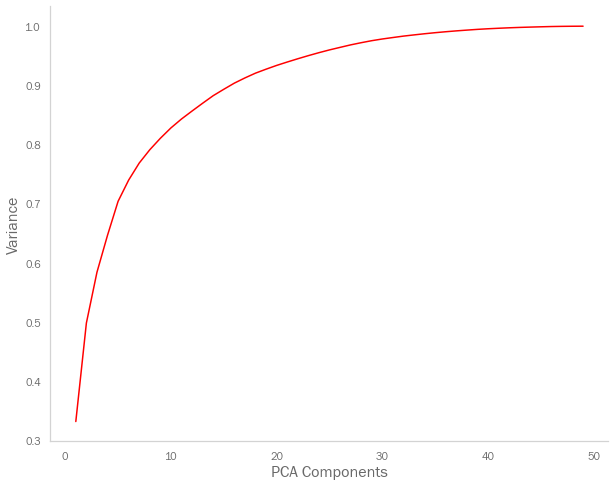

In [13]:
# log columns
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 50):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_gb_scaled) # has 86 features
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

In [14]:
pca_df.sort_values(by='var', ascending=False).head(30)

,model,var
n,,
49,PCA(n_components=49),0.999881
48,PCA(n_components=48),0.999773
47,PCA(n_components=47),0.999587
46,PCA(n_components=46),0.999298
45,PCA(n_components=45),0.998835
44,PCA(n_components=44),0.998347
43,PCA(n_components=43),0.997811
42,PCA(n_components=42),0.997151
41,PCA(n_components=41),0.996377


In [15]:
# Reducing components down to 25 from 58 components still ensures 95% of the variance is explained (-33 features)

In [16]:
PCAmod = PCA(n_components=25)
PCAmod.fit(X_gb_scaled)
PCA_df_gb = pd.DataFrame(PCAmod.transform(X_gb_scaled))

In [17]:
PCA_df_gb.shape

(631, 25)

### UMAP

In [18]:
import umap
umap_c = umap.UMAP(n_components=25, metric='euclidean' , init='random', random_state=0)
umap_df = umap_c.fit_transform(X_gb_scaled)

In [19]:
umap_df.shape

(631, 25)

## Clustering Algorithms

### K-Means

#### UMAP

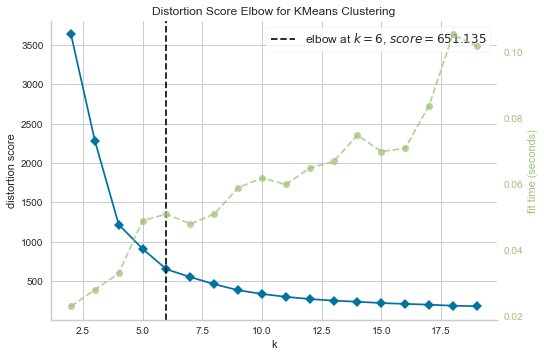

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
import yellowbrick

# Distortion Score

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(umap_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

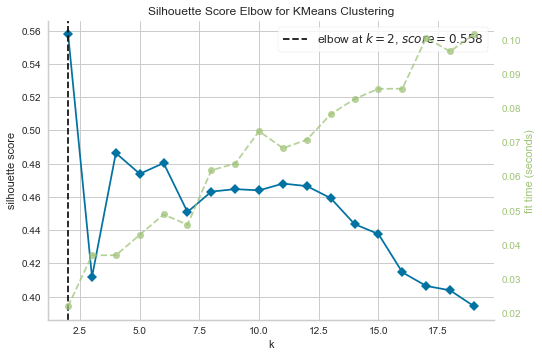

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Silhouette Score

# Silhouette Coefficient is calculated using the mean intracluster distance (d1) and mean nearest cluster distance (d2)
# (d2 - d1) / max(d2 - d1)
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

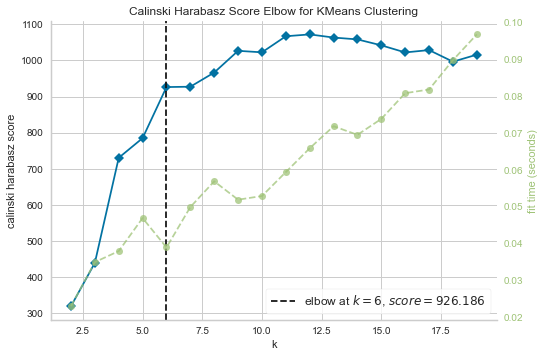

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [22]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

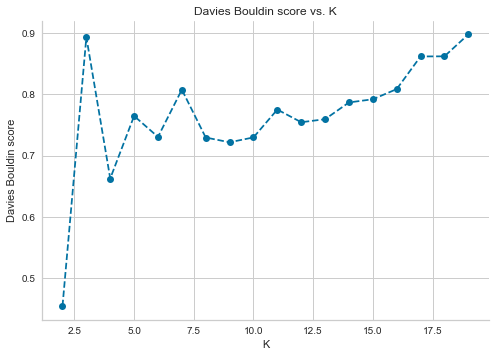

In [23]:
# Davies Bouldin Score
# Davies Bouldin Index - need at least 2 points in each cluster
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,20))
for center in centers:
    scores.append(get_kmeans_score(umap_df, center))


    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
# plt.vlines(x=6, ymin=0.0, ymax=min(scores), linestyle='--', color='r')
# plt.hlines(y=min(scores), xmin=0, xmax=6, linestyle='--', color='r')
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');
# plt.xlim(1.6, 20)
# plt.ylim(0.7, 1.25)

In [24]:
# 6 Clusters for Davies Bouldin
score = pd.DataFrame(scores, columns=['Davies_Bouldin_Score'])
score[score.Davies_Bouldin_Score == score.Davies_Bouldin_Score.min()].index[0]

0

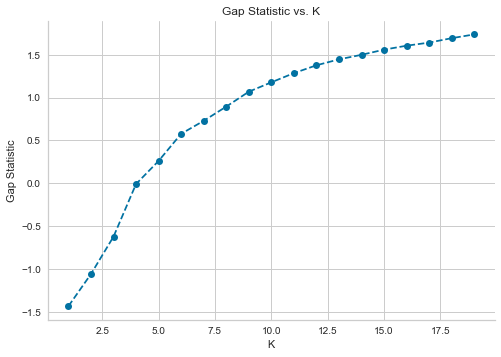

In [34]:
# Gap Statistic for K means


# https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods
# -for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
    # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


score_g, df_gb_gap_stat = optimalK(umap_df, nrefs=5, maxClusters=20)
plt.plot(df_gb_gap_stat['clusterCount'], df_gb_gap_stat['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

# The higher the value the better clusters but we can see the gradient decreases signficantly around 6-7 clusters

####  Clusters analysis

In [80]:
#Instantiate and run a KMeans algorithm
k_means = KMeans(n_clusters=6)
k_means.fit(umap_df)

#Store the predicted labels
km_preds_gb = []
km_preds_gb.append(k_means.predict(umap_df))

In [81]:
# We will go with 6 clusters

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(km_preds_gb[0],
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5
seat_types_yg,,,,,,
con lab marginal,21,35,15,0,66,10
con ld marginal,9,0,4,0,0,9
con pc marginal,1,0,0,0,0,0
con safe,114,5,1,0,39,100
con snp marginal,1,0,0,19,0,0
green safe,0,1,0,0,0,0
lab ld marginal,0,0,0,0,0,1
lab safe,1,57,42,0,35,0
lab snp marginal,0,0,0,10,0,0


In [82]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T

gb_cluster_bar

seat_types_yg,con safe,con lab marginal,lab safe,ld safe,con ld marginal,lab ld marginal,green safe,con snp marginal,snp safe,ld snp marginal
Cluster,,,,,,,,,,
0,0.770270,0.141892,0.006757,0.000000,0.060811,0.000000,0.000000,0.006757,0.000000,0.013514
1,0.048077,0.336538,0.548077,0.009615,0.000000,0.000000,0.009615,0.000000,0.048077,0.000000
2,0.016129,0.241935,0.677419,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.487179,0.461538,0.051282
4,0.278571,0.471429,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.806452,0.080645,0.000000,0.024194,0.072581,0.008065,0.000000,0.000000,0.000000,0.008065


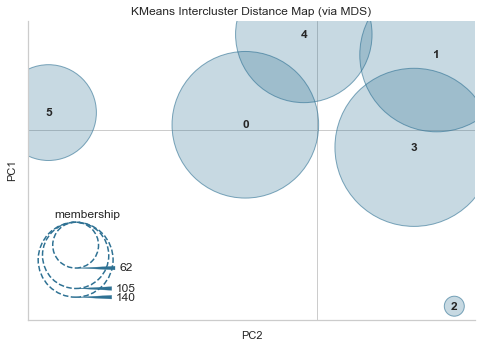

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [83]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Fit K-Means
kmeans_1 = KMeans(n_clusters=6,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(umap_df)
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

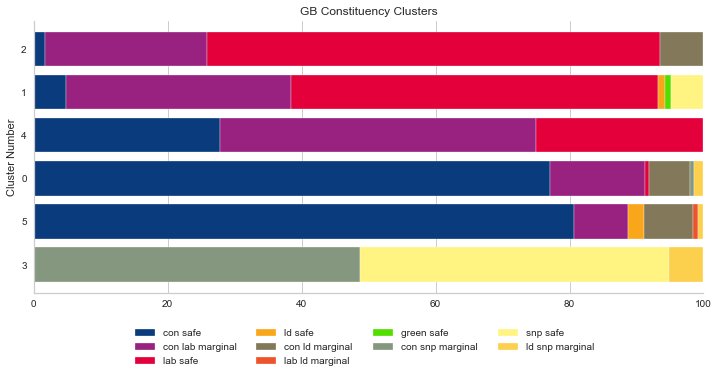

In [84]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by='lab safe', ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

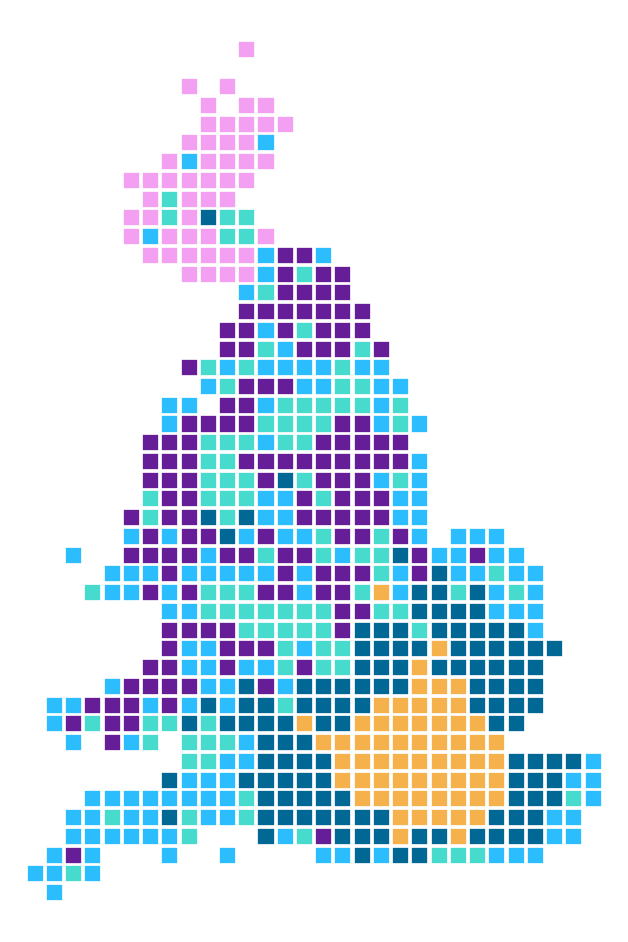

In [85]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [102]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


# define the model
model = KMeans(n_clusters=6)

# fit model and predict clusters
yhat = model.fit(umap_df)
yhat_2 = model.fit_predict(umap_df)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(PCA_df_gb, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(PCA_df_gb, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(PCA_df_gb, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1280
Calinski Harabasz Score: 106.3683
Davies Bouldin Score: 1.6599


#### PCA

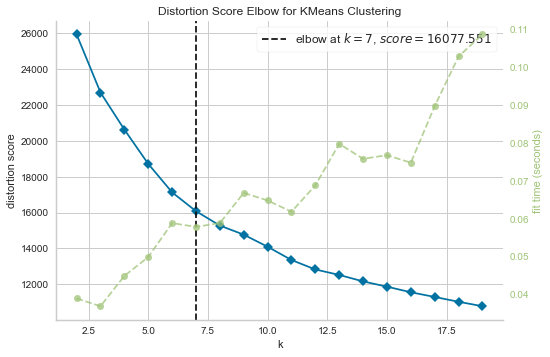

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
import yellowbrick

# Distortion Score

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(PCA_df_gb)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

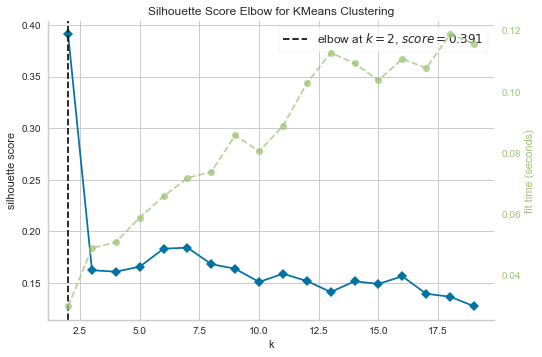

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
# Silhouette Score

# Silhouette Coefficient is calculated using the mean intracluster distance (d1) and mean nearest cluster distance (d2)
# (d2 - d1) / max(d2 - d1)
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

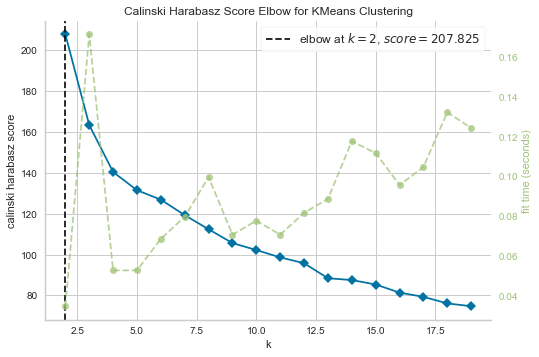

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

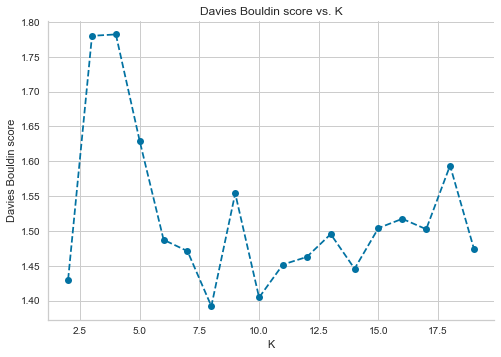

In [29]:
# Davies Bouldin Score
# Davies Bouldin Index - need at least 2 points in each cluster
# As DB Index falls, clustering improves
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,20))
for center in centers:
    scores.append(get_kmeans_score(PCA_df_gb, center))


    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
# plt.vlines(x=6, ymin=0.0, ymax=min(scores), linestyle='--', color='r')
# plt.hlines(y=min(scores), xmin=0, xmax=6, linestyle='--', color='r')
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');
# plt.xlim(1.6, 20)
# plt.ylim(0.7, 1.25)

# 8 Clusters with Davies Bouldin

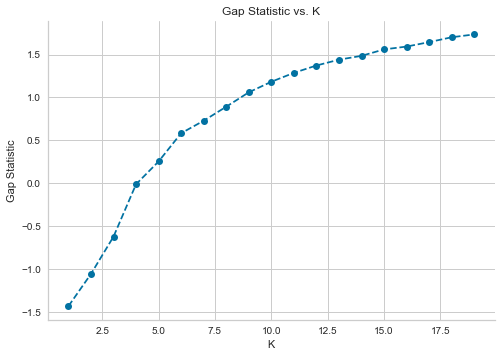

In [36]:
# Gap Statistic

score_g, df_gb_gap_stat = optimalK(umap_df, nrefs=5, maxClusters=20)
plt.plot(df_gb_gap_stat['clusterCount'], df_gb_gap_stat['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

####  Clusters analysis

In [93]:
# We will go with the distortion score of 7 as it is more consistent throughout all the dimensionality reduction methods

#Instantiate and run a KMeans algorithm
k_means = KMeans(n_clusters=7)
k_means.fit(PCA_df_gb)

#Store the predicted labels
km_preds_gb = []
km_preds_gb.append(k_means.predict(PCA_df_gb))

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(km_preds_gb[0], # We choose 7 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6
seat_types_yg,,,,,,,
con lab marginal,6,27,20,8,4,0,82
con ld marginal,0,8,10,0,4,0,0
con pc marginal,0,1,0,0,0,0,0
con safe,0,121,83,0,1,0,54
con snp marginal,0,0,1,0,0,19,0
green safe,0,0,0,1,0,0,0
lab ld marginal,0,0,1,0,0,0,0
lab safe,29,1,4,22,23,0,56
lab snp marginal,0,0,0,0,0,10,0


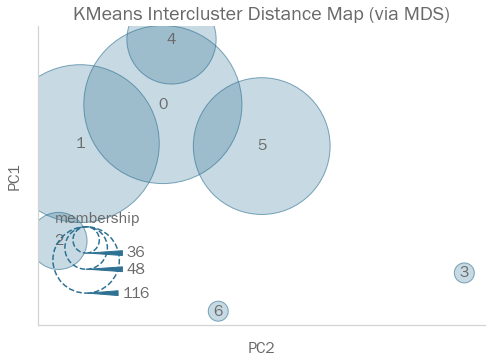

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [94]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Fit K-Means
kmeans_1 = KMeans(n_clusters=7,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(PCA_df_gb)
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

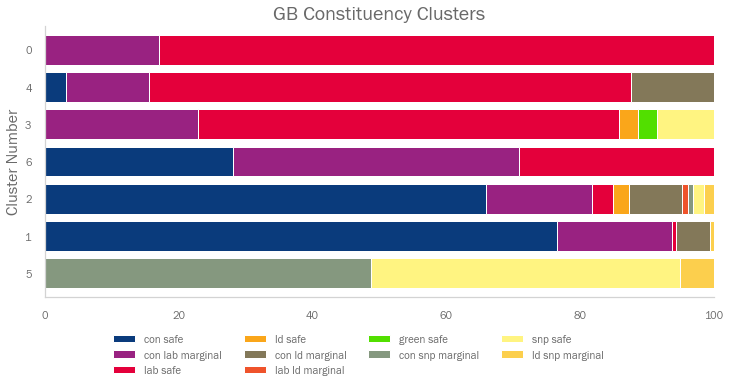

In [95]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by='lab safe', ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

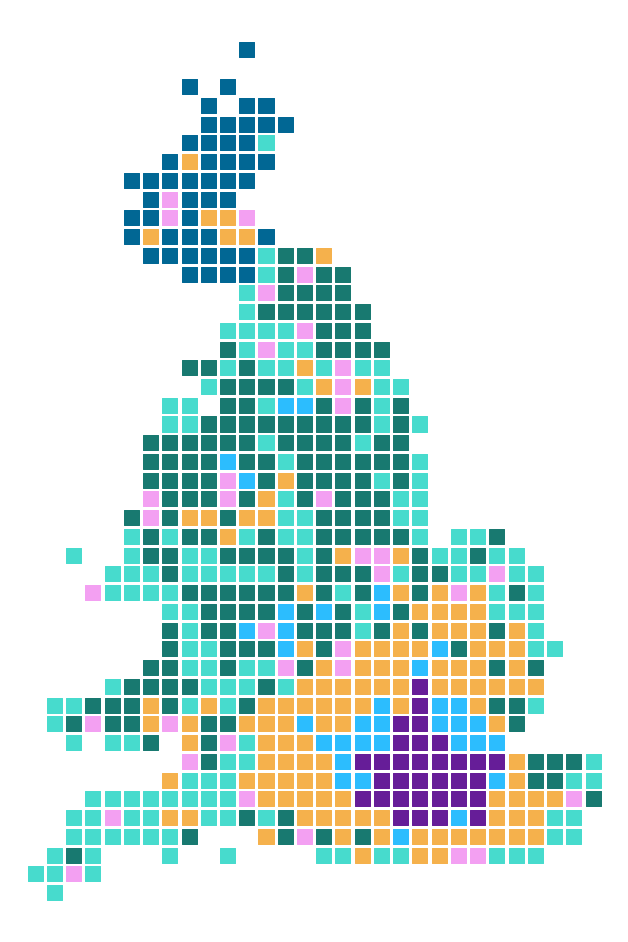

In [96]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [97]:
#Define a standard list of KPIs to look at
kpis_gb=['Pop_Density',
      '2019_Wage', 'HousePricePerWage', '%HousePriceGrowth',
      '%OwnOutright','%OwnWithMort', '%PrivateRent',
      '%SocialHousing','%Unemployment', 'UnemploymentChange',
      '%Heavy Industry & Manufacturing', '%Wholesale & Retail',
      '%FS & ICT', '%White', '%Muslim', '%BornUK',
      '%Level4+', '%LeaveVote', 'con%']

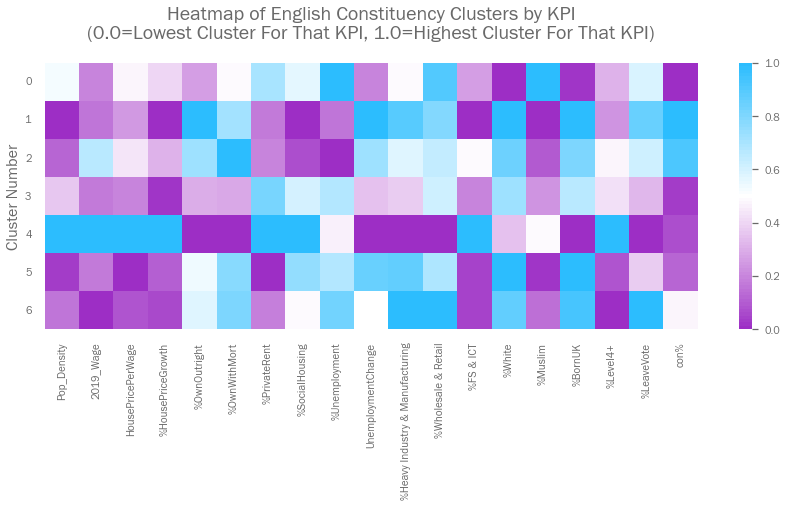

In [98]:
heatmap_cluster_kpis(kpis=kpis_gb,
        data=X_gb,cmap=CB91_Grad_BWP[::-1],size=0.7,
        cluster_data=gb_cluster_yg)

plt.title('Heatmap of English Constituency Clusters by KPI\n\
(0.0=Lowest Cluster For That KPI, 1.0=Highest Cluster For That KPI)\n')
plt.ylabel('Cluster Number');

In [101]:
# define the model
model = KMeans(n_clusters=7)

# fit model and predict clusters
yhat = model.fit(PCA_df_gb)
yhat_2 = model.fit_predict(PCA_df_gb)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(PCA_df_gb, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(PCA_df_gb, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(PCA_df_gb, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1562
Calinski Harabasz Score: 118.7324
Davies Bouldin Score: 1.5408


### HAC

#### UMAP

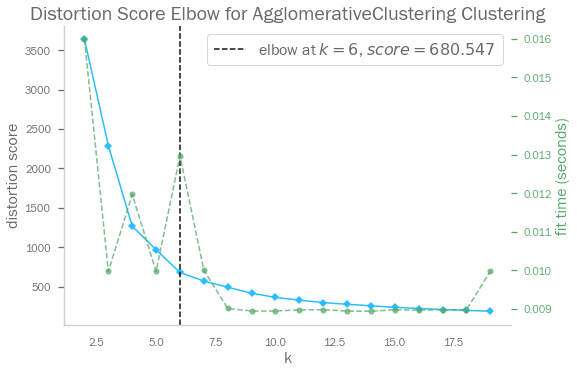

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
# Elbow Method for HAC
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(umap_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

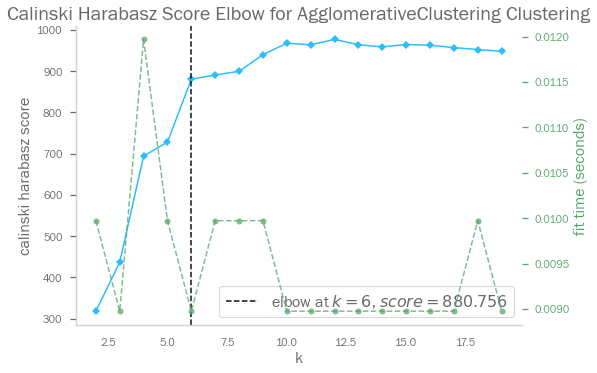

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [92]:
# Calinski Harabasz Score for HAC
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

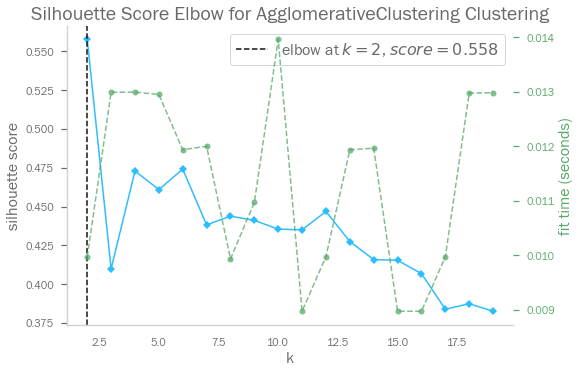

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [103]:
# Silhouette Score for HAC
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

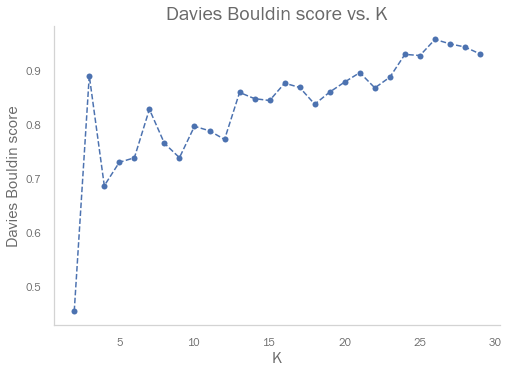

In [104]:
# Davies Bouldin score for HAC
from sklearn.metrics import davies_bouldin_score
def get_hac_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    AC = AgglomerativeClustering(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = AC.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_hac_score(umap_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


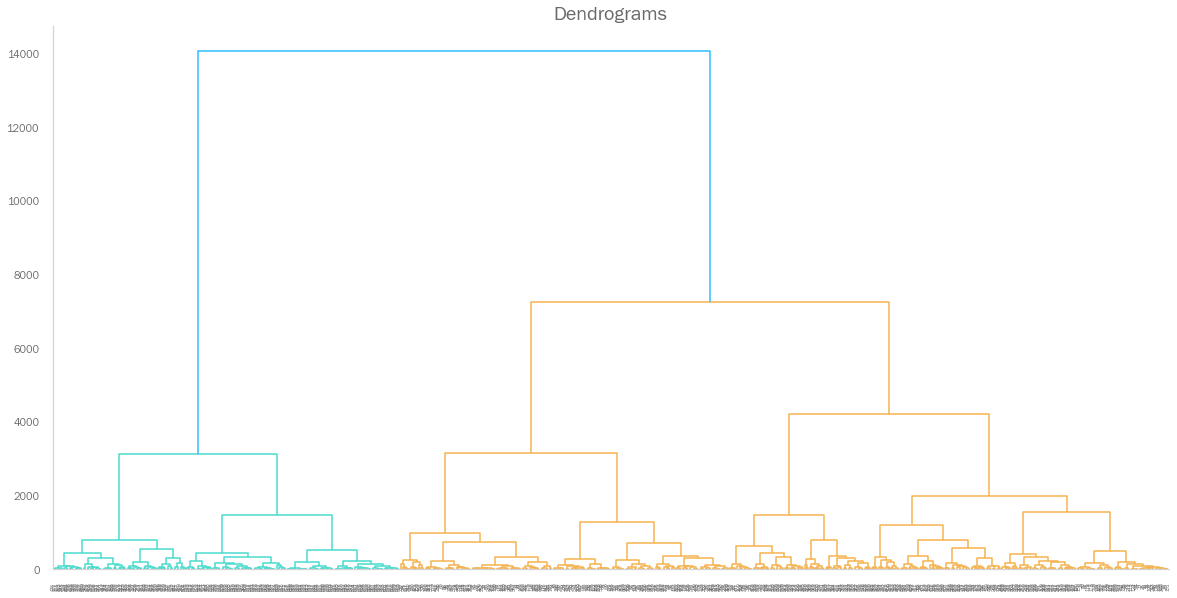

In [106]:
# Dendogram for Heirarchical Clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

 
model = AgglomerativeClustering()
model = model.fit(umap_df)
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
plt.title("Dendrograms") 
dn = hierarchy.dendrogram(Z)

In [107]:
# define the model - We will go with 6 clusters
model = AgglomerativeClustering(n_clusters=6)

# fit model and predict clusters
yhat = model.fit(umap_df)
yhat_2 = model.fit_predict(umap_df)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(umap_df, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(umap_df, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(umap_df, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4741
Calinski Harabasz Score: 880.7557
Davies Bouldin Score: 0.7387


In [109]:
#Instantiate and run a HAC algorithm
model = AgglomerativeClustering(n_clusters=6)

#Store the predicted labels
hac_preds_gb = []
hac_preds_gb.append(model.fit_predict(umap_df))

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(hac_preds_gb[0], # We choose 7 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5
seat_types_yg,,,,,,
con lab marginal,21,14,38,0,63,11
con ld marginal,10,9,0,0,0,3
con pc marginal,1,0,0,0,0,0
con safe,137,78,4,0,39,1
con snp marginal,1,0,0,19,0,0
green safe,0,0,1,0,0,0
lab ld marginal,0,1,0,0,0,0
lab safe,1,0,57,0,35,42
lab snp marginal,0,0,0,10,0,0


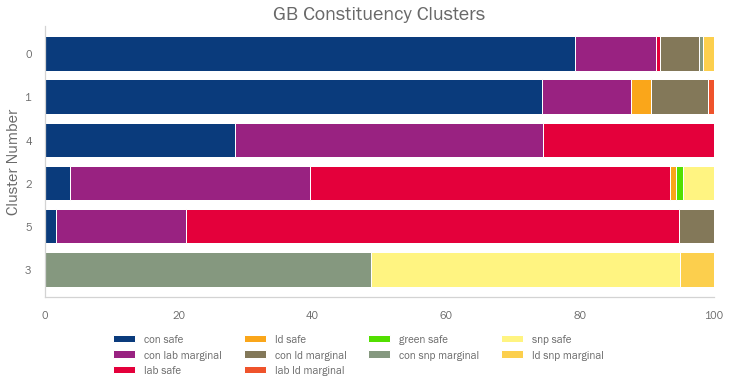

In [111]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by='con safe', ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

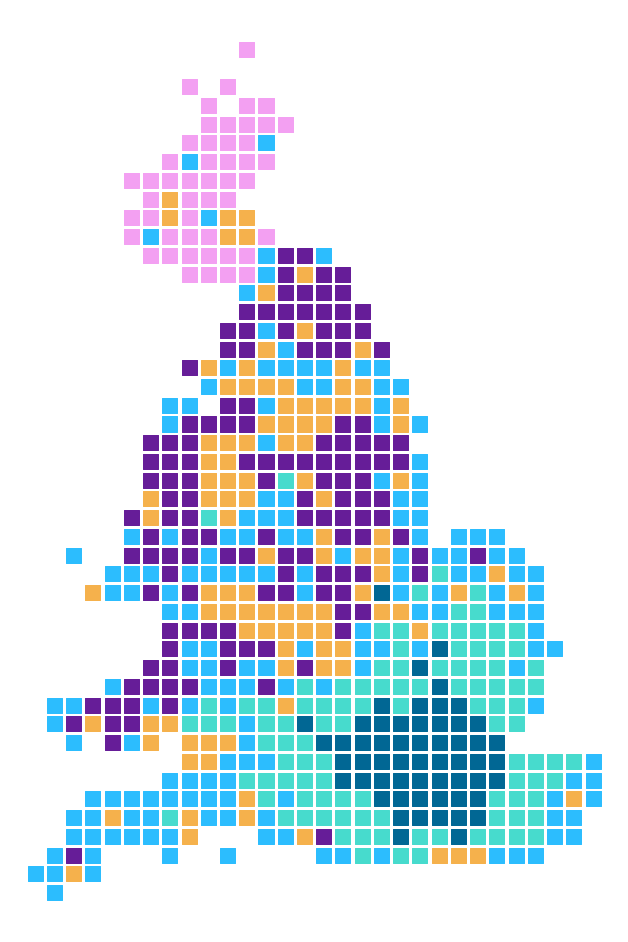

In [112]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

#### PCA

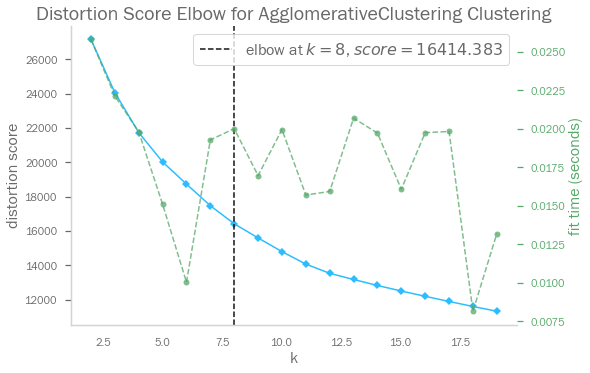

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
# Elbow Method for HAC
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(PCA_df_gb)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

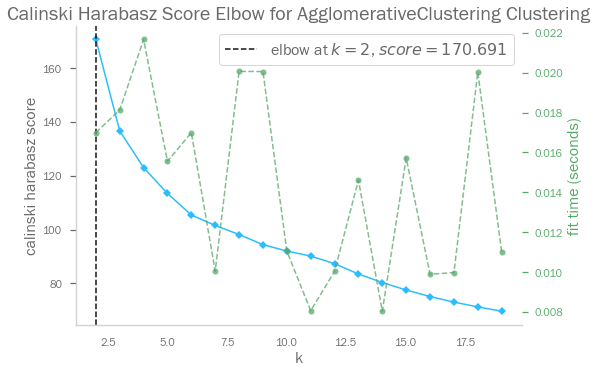

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [115]:
# Calinski Harabasz Score for HAC
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

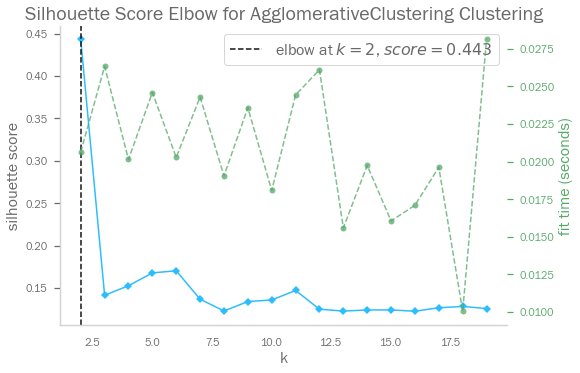

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [116]:
# Silhouette Score for HAC
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(PCA_df_gb)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

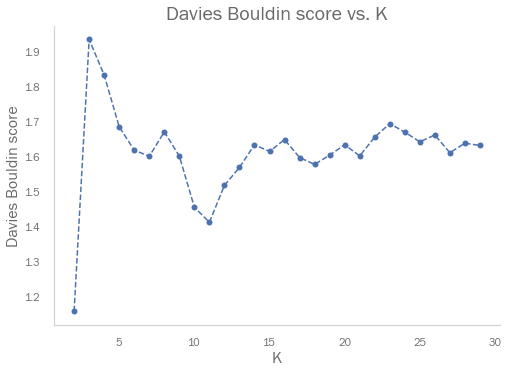

In [117]:
# Davies Bouldin score for HAC
from sklearn.metrics import davies_bouldin_score
def get_hac_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    AC = AgglomerativeClustering(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = AC.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_hac_score(PCA_df_gb, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


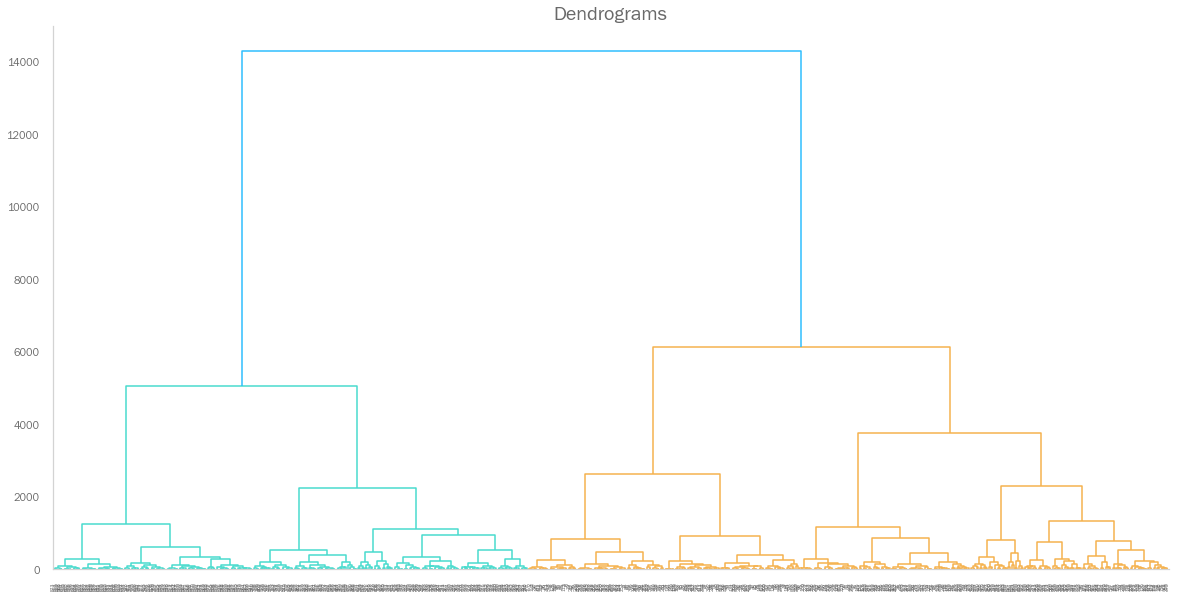

In [118]:
# Dendogram for Heirarchical Clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

 
model = AgglomerativeClustering()
model = model.fit(PCA_df_gb)
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
plt.title("Dendrograms") 
dn = hierarchy.dendrogram(Z)

In [119]:
# define the model - We will go with 8 clusters
model = AgglomerativeClustering(n_clusters=8)

# fit model and predict clusters
yhat = model.fit(PCA_df_gb)
yhat_2 = model.fit_predict(PCA_df_gb)

# retrieve unique clusters
clusters = np.unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(PCA_df_gb, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(PCA_df_gb, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(PCA_df_gb, yhat_2)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1228
Calinski Harabasz Score: 98.1723
Davies Bouldin Score: 1.6709


#### Clustering Analysis

In [120]:
#Instantiate and run a HAC algorithm
model = AgglomerativeClustering(n_clusters=8)

#Store the predicted labels
hac_preds_gb = []
hac_preds_gb.append(model.fit_predict(PCA_df_gb))

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(hac_preds_gb[0], # We choose 7 clusters
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7
seat_types_yg,,,,,,,,
con lab marginal,39,0,5,9,40,3,0,51
con ld marginal,1,0,4,0,6,0,11,0
con pc marginal,0,0,0,0,1,0,0,0
con safe,41,0,1,0,120,0,73,24
con snp marginal,0,19,0,0,0,0,1,0
green safe,0,0,0,1,0,0,0,0
lab ld marginal,0,0,0,0,0,0,1,0
lab safe,33,0,22,25,2,19,0,34
lab snp marginal,0,10,0,0,0,0,0,0


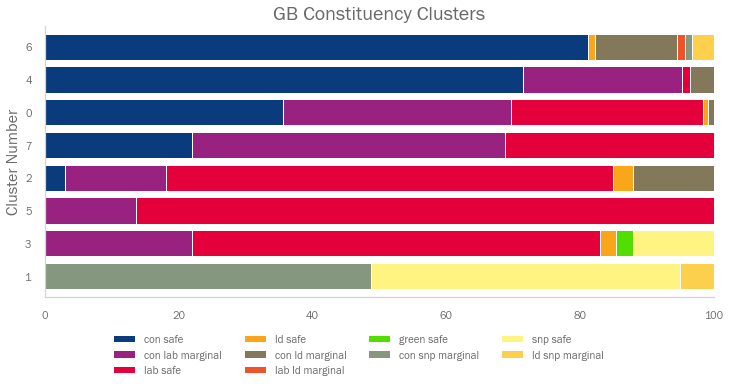

In [121]:
party_list = ['con safe','con lab marginal',
              'lab safe','ld safe',
              'con ld marginal','lab ld marginal',
              'green safe', 'con snp marginal', 'snp safe', 'ld snp marginal']

party_colors = [con_blue, con_lab, lab_red, lib_yel,
               con_lib, lab_lib, green_green, con_snp, snp_yel, lib_snp]

gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by='con safe', ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

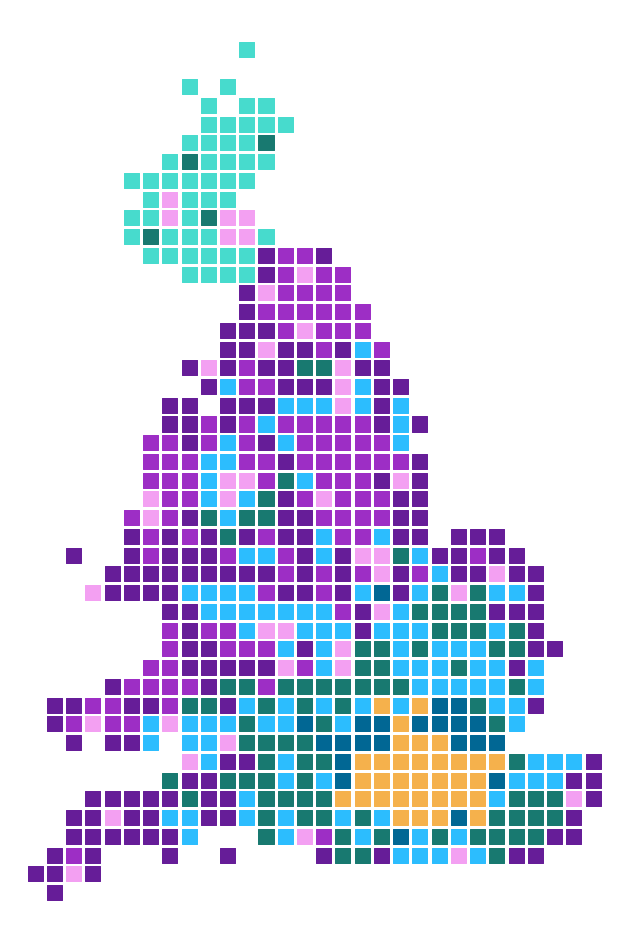

In [122]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

### DB Clustering

In [123]:
from sklearn.cluster import DBSCAN

#### UMAP

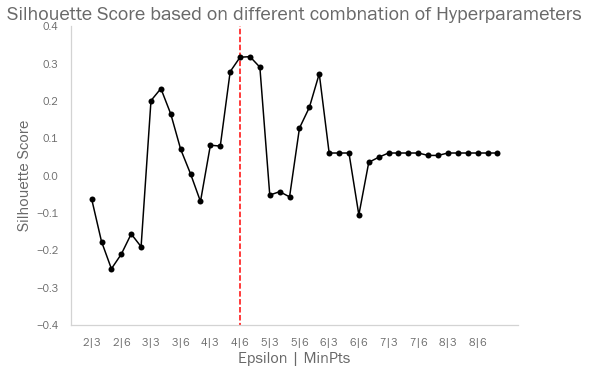

<Figure size 576x396 with 0 Axes>

In [240]:
from sklearn import metrics

# Create empty lists
S=[] # this is to store Silhouette scores
D = [] # Check davies bouldin score
H = [] # Check calinski harabasz

comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(2, 9)  # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,9)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/10, min_samples=j)
        # Fit the model 
        clm = model.fit(umap_df)
        # Calculate Silhoutte, Davies Bouldin and Harabasz Score and append to a list
        S.append(metrics.silhouette_score(umap_df, clm.labels_, metric='euclidean'))
        D.append(metrics.davies_bouldin_score(umap_df, clm.labels_))
        H.append(metrics.calinski_harabasz_score(umap_df, clm.labels_))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph


# Plot the resulting Silhouette scores on a graph
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, S, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(16))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.vlines(x=15, ymin=-0.6, ymax=0.75, color='red', linestyle='--')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.ylim(-0.4, 0.4)
plt.show()
plt.tight_layout()

In [209]:
# Silhouette Score --> Epsilon = 0.4, Minimum points = 6

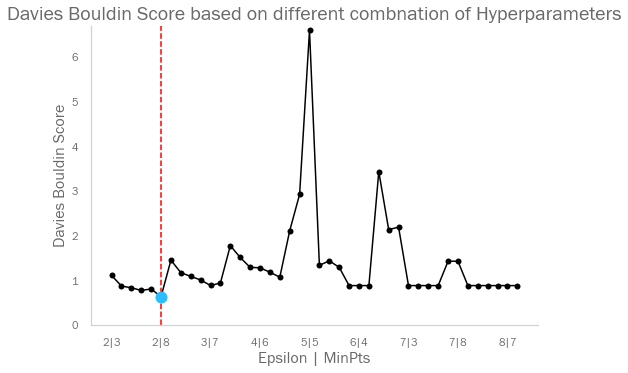

<Figure size 576x396 with 0 Axes>

In [247]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, D, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(11))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Davies Bouldin Score')
plt.vlines(x=5, ymin=0, ymax=10, color='red', linestyle='--')
plt.plot(5, min(D), 'o', markersize=12)
plt.ylim(0, max(D)+0.1)
plt.title('Davies Bouldin Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

In [173]:
min(D)

1.25636159263321

In [184]:
# Davies Bouldin Score --> Epsilon = 0.2, Minimum Points = 8

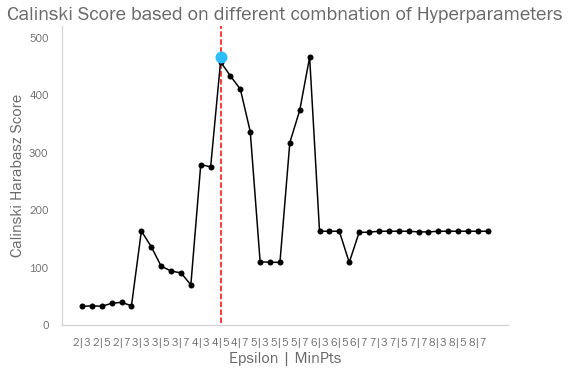

<Figure size 576x396 with 0 Axes>

In [270]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, H, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(25))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Calinski Harabasz Score')
plt.vlines(x=14, ymin=-10, ymax=600, color='red', linestyle='--')
plt.plot(14, max(H), 'o', markersize=12)
plt.title('Calinski Score based on different combnation of Hyperparameters')
plt.ylim(0, 520)
plt.show()
plt.tight_layout()

In [208]:
# Calinski Score --> Epsilon = 0.4, Minimum Points = 5

In [271]:
# First model: eps=0.4, MinPts=6
model46 = DBSCAN(eps=0.4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=6, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm46 = model46.fit(umap_df)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm46.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [272]:
# Let us try the Davies Boudlin result to see if we get more clusters (-1 are outliers)
model28 = DBSCAN(eps=0.2, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=8, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm28 = model28.fit(umap_df)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm28.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5]


In [273]:
# Lastly we try Calinski Harabasz
# First model: eps=0.4, MinPts=5
model45 = DBSCAN(eps=0.4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=5, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm45 = model45.fit(umap_df)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm45.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [274]:
# Out of all, focusing on the Davies Boudlin Index would be best as the cluster number are appropriate for further inspection

In [277]:
preds = model28.fit_predict(umap_df)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0,1,2,3,4,5
seat_types_yg,,,,,,,
con lab marginal,144,0,2,0,0,0,1
con ld marginal,19,0,2,1,0,0,0
con pc marginal,1,0,0,0,0,0,0
con safe,253,0,0,6,0,0,0
con snp marginal,15,0,0,0,0,5,0
green safe,1,0,0,0,0,0,0
lab ld marginal,1,0,0,0,0,0,0
lab safe,113,10,4,0,0,0,8
lab snp marginal,5,0,0,0,5,0,0


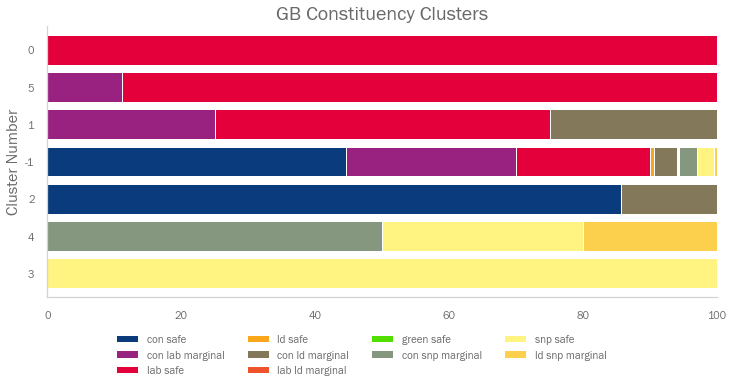

In [284]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['lab safe', 'con safe'], ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

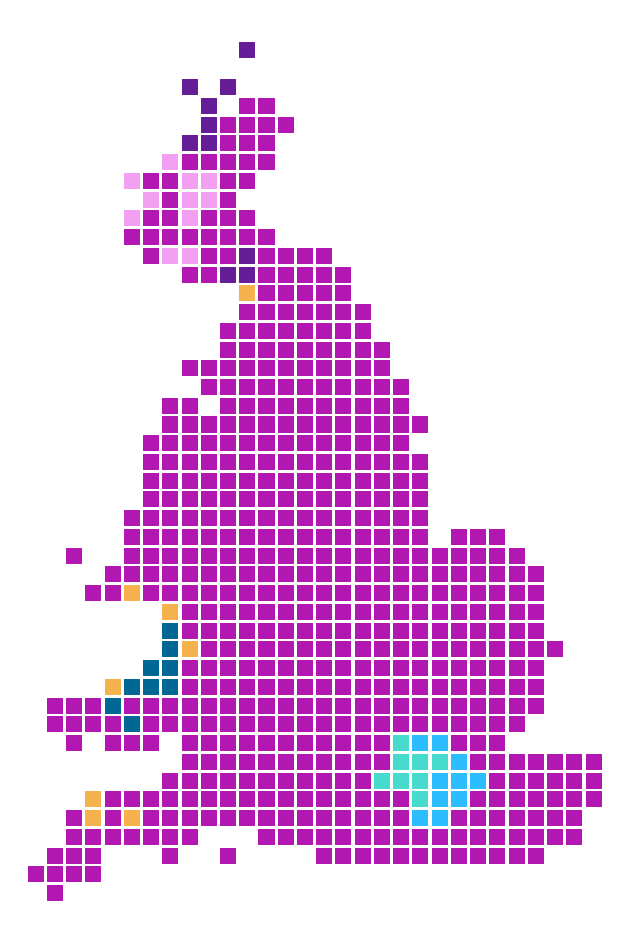

In [285]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

#### PCA

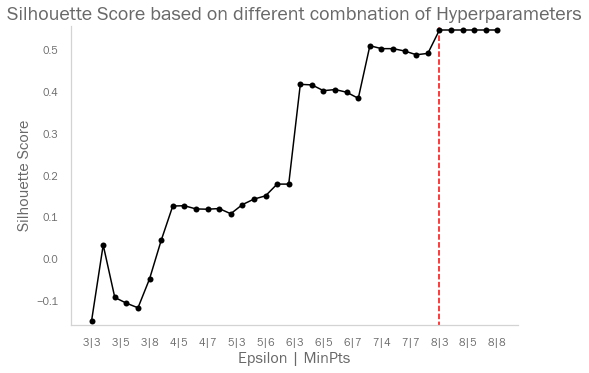

<Figure size 576x396 with 0 Axes>

In [297]:
from sklearn import metrics

# Create empty lists
S=[] # this is to store Silhouette scores
D = [] # Check davies bouldin score
H = [] # Check calinski harabasz

comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(3, 9)  # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,9)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k, min_samples=j)
        # Fit the model 
        clm = model.fit(PCA_df_gb)
        # Calculate Silhoutte, Davies Bouldin and Harabasz Score and append to a list
        S.append(metrics.silhouette_score(PCA_df_gb, clm.labels_, metric='euclidean'))
        D.append(metrics.davies_bouldin_score(PCA_df_gb, clm.labels_))
        H.append(metrics.calinski_harabasz_score(PCA_df_gb, clm.labels_))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph


# Plot the resulting Silhouette scores on a graph
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, S, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(16))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.vlines(x=30, ymin=-0.6, ymax=0.75, color='red', linestyle='--')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.ylim(min(S) - 0.01, max(S) + 0.01)
plt.show()
plt.tight_layout()

In [ ]:
# Silhouette Score --> epsilon = 8, min_points = 3

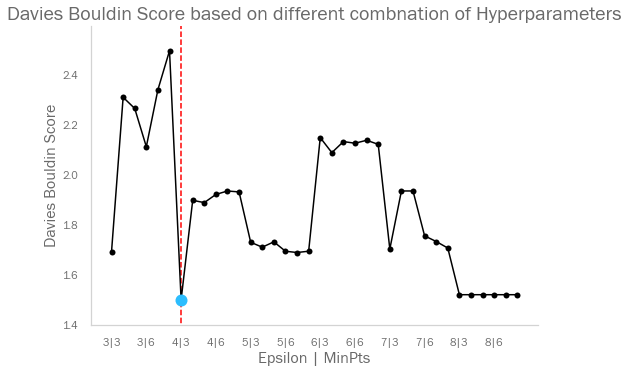

<Figure size 576x396 with 0 Axes>

In [304]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, D, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(13))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Davies Bouldin Score')
plt.vlines(x=6, ymin=0, ymax=10, color='red', linestyle='--')
plt.plot(6, min(D), 'o', markersize=12)
plt.ylim(min(D)-0.1, max(D)+0.1)
plt.title('Davies Bouldin Score based on different combnation of Hyperparameters')
plt.show()
plt.tight_layout()

In [ ]:
# Davies Bouldin Index --> epsilon = 4, minimum_points=3

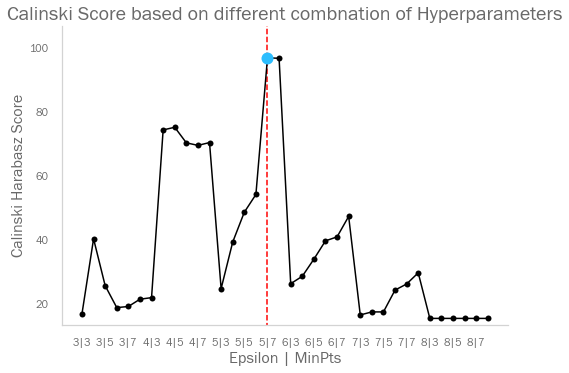

<Figure size 576x396 with 0 Axes>

In [311]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(comb, H, 'bo-', color='black')
from matplotlib.ticker import MaxNLocator

ax.xaxis.set_major_locator(MaxNLocator(25))

plt.xlabel('Epsilon | MinPts')
plt.ylabel('Calinski Harabasz Score')
plt.vlines(x=16, ymin=-10, ymax=600, color='red', linestyle='--')
plt.plot(16, max(H), 'o', markersize=12)
plt.title('Calinski Score based on different combnation of Hyperparameters')
plt.ylim(min(H) - 2, max(H) + 10)
plt.show()
plt.tight_layout()

In [312]:
# Calinski Score --> epsilon = 5, minimum_points=7

#### Clustering Analysis

In [313]:
# First model: eps=8, MinPts=3
model83 = DBSCAN(eps=8, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm83 = model83.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm83.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0]


In [315]:
# Let us try the Davies Boudlin result to see if we get more clusters (-1 are outliers)
model43 = DBSCAN(eps=4, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=3, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm43 = model43.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm43.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1  2  3  4  5  6  7  8  9]


In [316]:
# Lastly we try Calinski Harabasz
# First model: eps=5, MinPts=7
model57 = DBSCAN(eps=5, # default=0.5, The maximum distance between two samples for one to be considered as in the neighborhood of the other.
               min_samples=7, # default=5, The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
               metric='euclidean', # default='euclidean'. The metric to use when calculating distance between instances in a feature array. 
               metric_params=None, # default=None, Additional keyword arguments for the metric function.
               algorithm='auto', # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’, The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
               leaf_size=30, # default=30, Leaf size passed to BallTree or cKDTree.
               p=None, # default=None, The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2
               n_jobs=-1, # default=None, The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
              )

# Fit the models
clm57 = model57.fit(PCA_df_gb)

# Print DBSCAN results
print('*************** DBSCAN Clustering Model ***************')
print("Cluster labels for the first model")
print(np.unique(clm57.labels_))

*************** DBSCAN Clustering Model ***************
Cluster labels for the first model
[-1  0  1]


In [317]:
# Again with Davies Bouldin, we get the most suitable number of clusters and we will go with that

In [320]:
preds = model43.fit_predict(PCA_df_gb)

db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(preds)

gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,-1,0,1,2,3,4,5,6,7,8,9
seat_types_yg,,,,,,,,,,,
con lab marginal,25,118,0,0,0,2,2,0,0,0,0
con ld marginal,9,13,0,0,0,0,0,0,0,0,0
con pc marginal,0,1,0,0,0,0,0,0,0,0,0
con safe,10,249,0,0,0,0,0,0,0,0,0
con snp marginal,5,0,0,0,0,0,0,12,3,0,0
green safe,1,0,0,0,0,0,0,0,0,0,0
lab ld marginal,1,0,0,0,0,0,0,0,0,0,0
lab safe,67,55,3,5,3,1,1,0,0,0,0
lab snp marginal,0,0,0,0,0,0,0,8,0,0,2


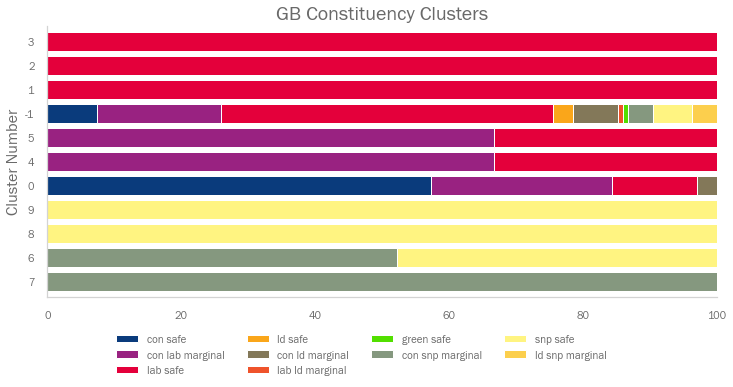

In [322]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['lab safe', 'con safe',
                                                                                    'snp safe'], ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

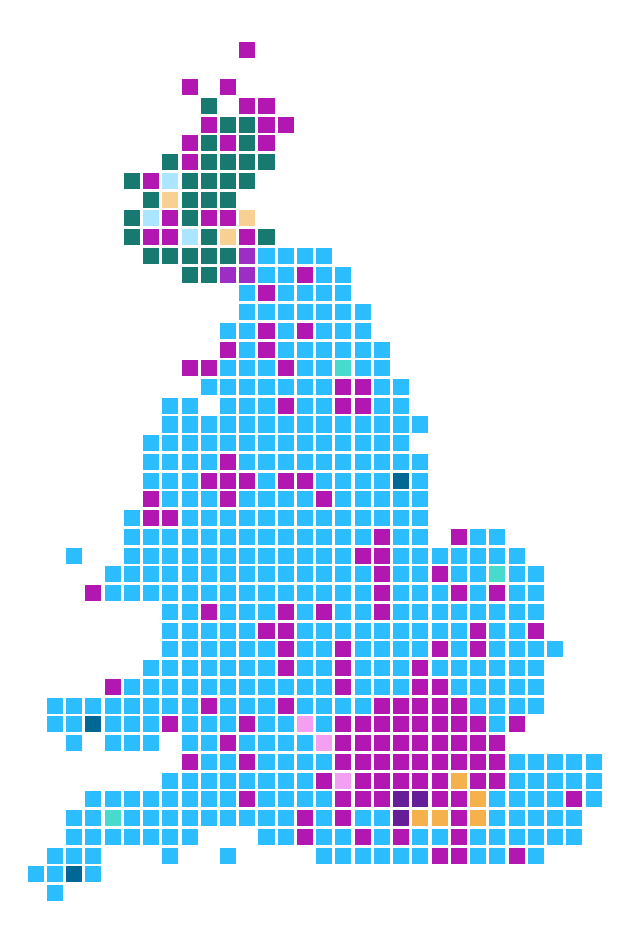

In [323]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

6.66899702301626


<Figure size 360x360 with 0 Axes>

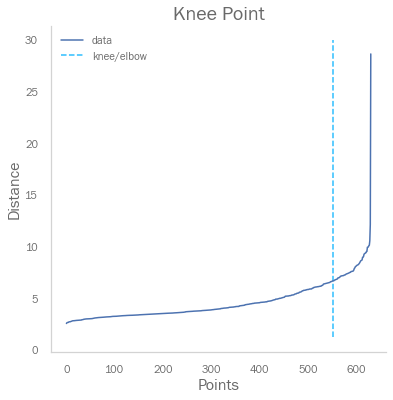

In [328]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(PCA_df_gb)
distances, indices = neighbors.kneighbors(PCA_df_gb)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

### Mean Shift

#### UMAP

In [329]:
from sklearn.cluster import MeanShift

In [331]:
# Calinski Harabasz Score for Mean Shift
bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b/10)
        model = ms.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_d = calinski_harabasz_score(umap_df, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=2)

,Bandwiths,Calinski_Harabasz_Score
8,10,993.422909


In [333]:
# Silhouette Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b/10)
        model = ms.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_d = silhouette_score(umap_df, model_2, metric='euclidean')
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Bandwiths,Silhouette_Score
8,10,0.452139


In [334]:
# Davies Bouldin Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b/10)
        model = ms.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_d = davies_bouldin_score(umap_df, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.min()]
score_2.head(n=2)

,Bandwiths,Davies_Bouldin_Score
0,2,0.398087


In [339]:
ms = MeanShift(bandwidth=1) # Majority is 10/10 = 1
ms.fit(umap_df)

yhat = ms.predict(umap_df)
# retrieve unique clusters
clusters = np.unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8,9
seat_types_yg,,,,,,,,,,
con lab marginal,8,14,55,0,15,17,14,24,0,0
con ld marginal,6,2,0,4,3,0,0,0,0,7
con pc marginal,1,0,0,0,0,0,0,0,0,0
con safe,58,49,34,39,1,1,42,2,0,33
con snp marginal,0,1,0,0,0,0,0,0,19,0
green safe,0,0,0,0,0,1,0,0,0,0
lab ld marginal,0,0,0,1,0,0,0,0,0,0
lab safe,0,1,34,0,42,35,0,23,0,0
lab snp marginal,0,0,0,0,0,0,0,0,10,0


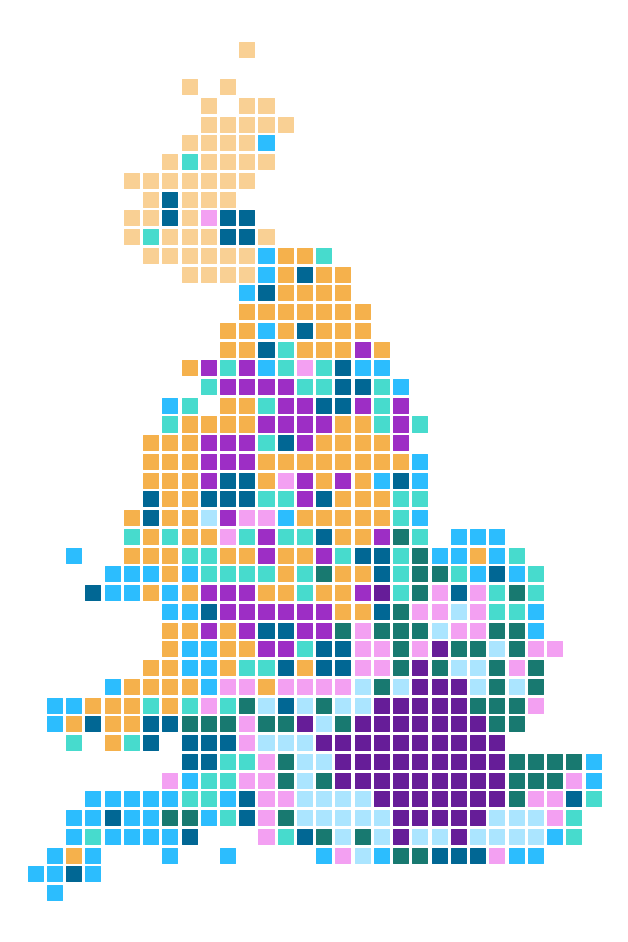

In [340]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

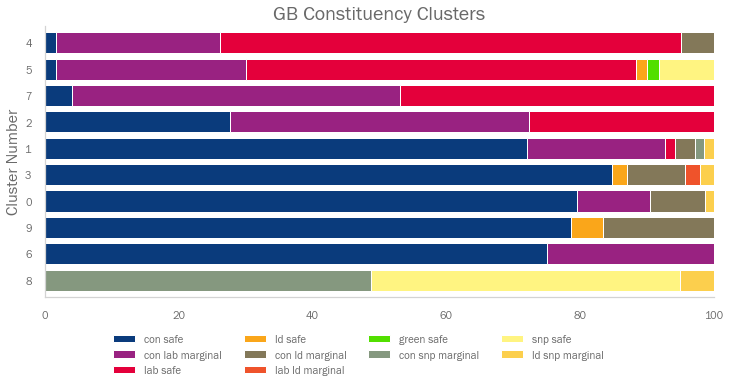

In [341]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['lab safe', 'con safe',
                                                                                    'snp safe'], ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

#### PCA

In [342]:
# Calinski Harabasz Score for Mean Shift
bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=2)

,Bandwiths,Calinski_Harabasz_Score
6,8,67.7177


In [343]:
# Silhouette Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = silhouette_score(PCA_df_gb, model_2, metric='euclidean')
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Bandwiths,Silhouette_Score
7,9,0.723221
8,10,0.723221


In [344]:
# Davies Bouldin Score for Mean Shift


bandwidths = range(2, 11)
score=[]
for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        model = ms.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_d = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((b, score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Bandwiths', 'Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.min()]
score_2.head(n=2)

,Bandwiths,Davies_Bouldin_Score
7,9,0.194396
8,10,0.194396


In [351]:
ms = MeanShift(bandwidth=8) # Majority is 9 & 10 but we will go with 8 of Calinski as it gives us 5 clusters
ms.fit(PCA_df_gb)

yhat = ms.predict(PCA_df_gb)
# retrieve unique clusters
clusters = np.unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4
seat_types_yg,,,,,
con lab marginal,137,9,0,1,0
con ld marginal,17,4,0,0,1
con pc marginal,1,0,0,0,0
con safe,258,1,0,0,0
con snp marginal,15,0,0,0,5
green safe,0,1,0,0,0
lab ld marginal,1,0,0,0,0
lab safe,87,39,9,0,0
lab snp marginal,10,0,0,0,0


#### Clustering Analysis

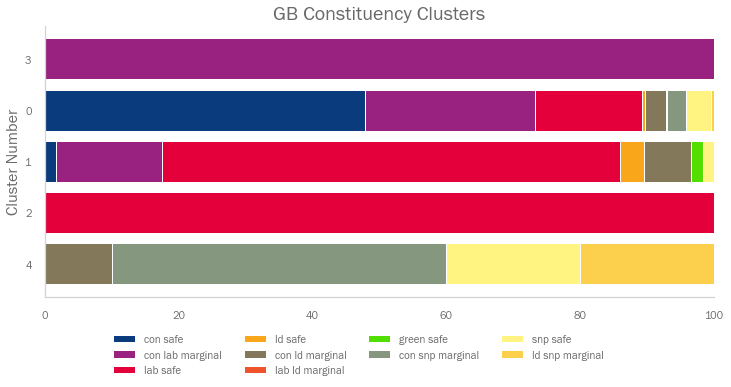

In [360]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['con lab marginal', 'lab safe'], 
                                                                                 ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

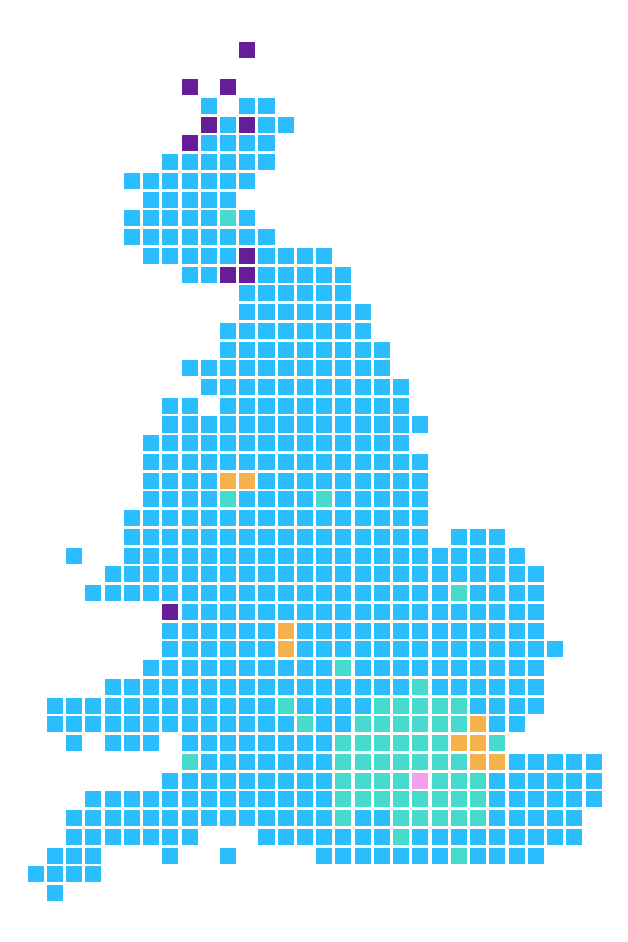

In [361]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [ ]:
# Interesting as how central london constituency is its own cluster 

### Gaussian Mixture Modelling

#### UMAP

In [375]:
# BIC for GMM
### Using Bayesian information criterion score for Gaussian Mixture Modelling 
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(umap_df)
        score.append((cov,n_comp,gmm.bic(umap_df)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
95,full,9,-93646.078917


In [363]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_c = calinski_harabasz_score(umap_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
7,spherical,9,1013.614746


In [364]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_c = silhouette_score(umap_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Silhouette_Score
2,spherical,4,0.484057


In [365]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(umap_df)
        model_2 = model.predict(umap_df)
        score_c = davies_bouldin_score(umap_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin']
score_2 = score_1[score_1.Davies_Bouldin == score_1.Davies_Bouldin.min()]
score_2.head(n=5)

,Covariance_Type,N_Components,Davies_Bouldin
2,spherical,4,0.657522


In [366]:
# Majority is spherical covariance and 4 components
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 4,covariance_type= "spherical", random_state = 10)
# fit the model
model.fit(umap_df)
# assign a cluster to each example
yhat = model.predict(umap_df)
# retrieve unique clusters
clusters = unique(yhat)

In [367]:
db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3
seat_types_yg,,,,
con lab marginal,23,103,0,21
con ld marginal,10,0,0,12
con pc marginal,0,0,0,1
con safe,54,61,0,144
con snp marginal,0,0,19,1
green safe,0,1,0,0
lab ld marginal,0,0,0,1
lab safe,42,92,0,1
lab snp marginal,0,0,10,0


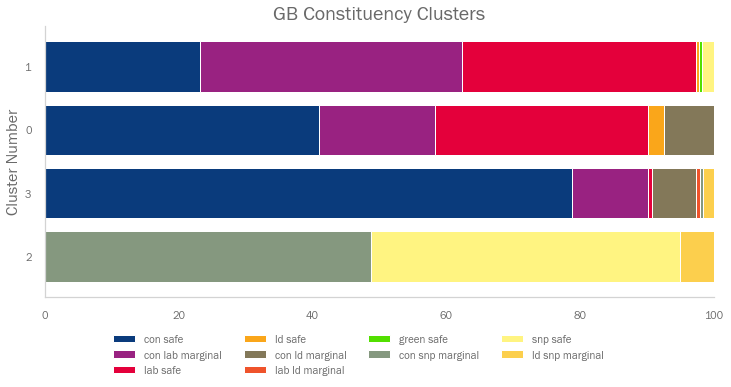

In [368]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['con lab marginal', 'lab safe'], 
                                                                                 ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

In [371]:
# Let us try Calinski 9 clusters
model = GaussianMixture(n_components= 9,covariance_type= "spherical", random_state = 10)
# fit the model
model.fit(umap_df)
# assign a cluster to each example
yhat = model.predict(umap_df)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8
seat_types_yg,,,,,,,,,
con lab marginal,0,42,0,8,17,15,13,13,39
con ld marginal,8,0,0,6,0,4,4,0,0
con pc marginal,0,0,0,1,0,0,0,0,0
con safe,45,35,0,60,1,1,73,41,3
con snp marginal,0,0,19,0,0,0,1,0,0
green safe,0,0,0,0,1,0,0,0,0
lab ld marginal,1,0,0,0,0,0,0,0,0
lab safe,0,19,0,0,35,42,1,0,38
lab snp marginal,0,0,10,0,0,0,0,0,0


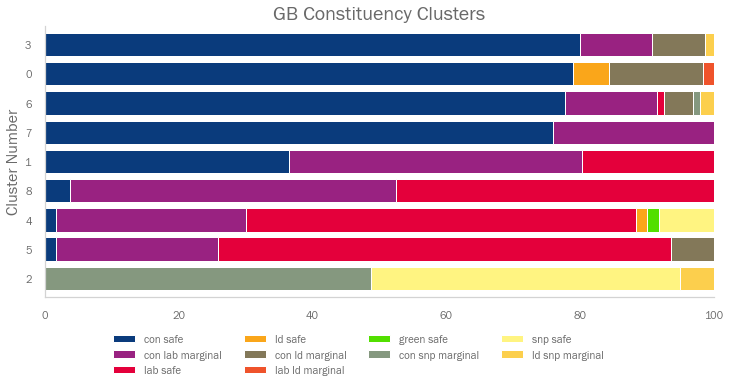

In [373]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['con safe', 'lab safe'], 
                                                                                 ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

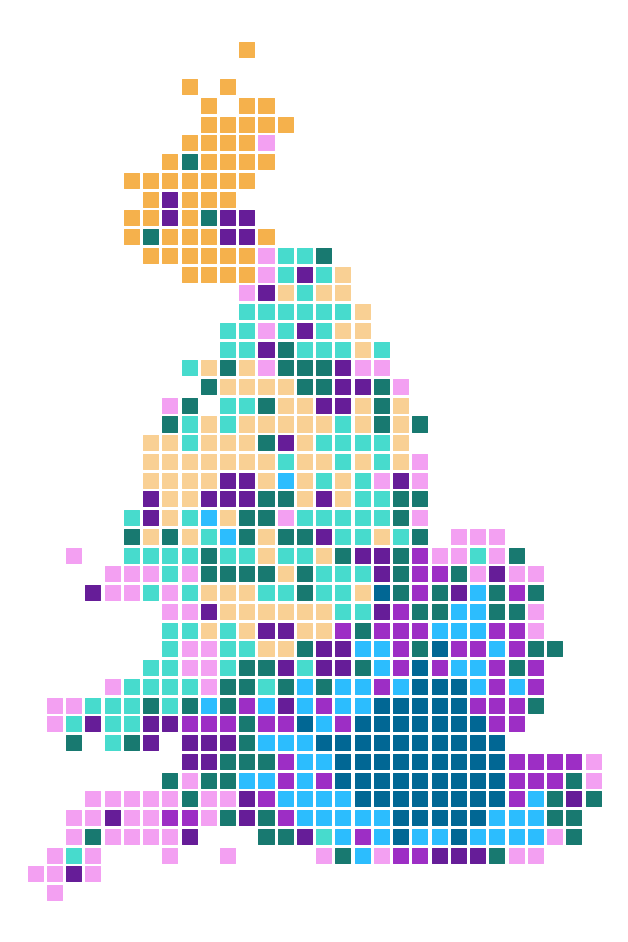

In [374]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

In [376]:
# Finally BIC Score of 9 Clusters and full covariance
# Let us try Calinski 9 clusters
model = GaussianMixture(n_components= 9,covariance_type= "full", random_state = 10)
# fit the model
model.fit(umap_df)
# assign a cluster to each example
yhat = model.predict(umap_df)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2,3,4,5,6,7,8
seat_types_yg,,,,,,,,,
con lab marginal,2,39,0,8,17,14,13,12,42
con ld marginal,8,0,0,6,0,4,4,0,0
con pc marginal,0,0,0,1,0,0,0,0,0
con safe,48,26,0,54,1,1,75,51,3
con snp marginal,0,0,19,0,0,0,1,0,0
green safe,0,0,0,0,1,0,0,0,0
lab ld marginal,1,0,0,0,0,0,0,0,0
lab safe,0,18,0,0,37,42,1,0,37
lab snp marginal,0,0,10,0,0,0,0,0,0


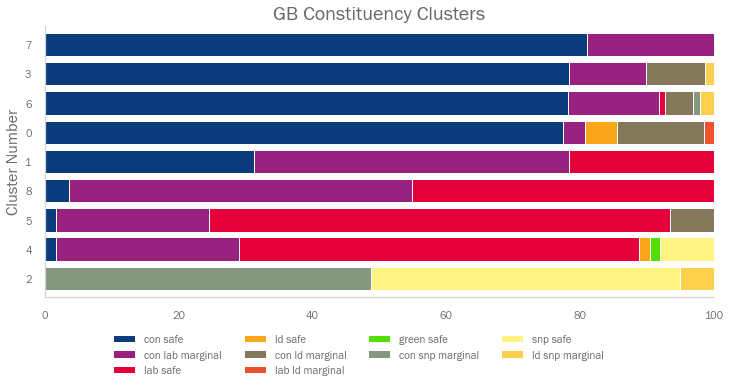

In [377]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['con safe', 'lab safe'], 
                                                                                 ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

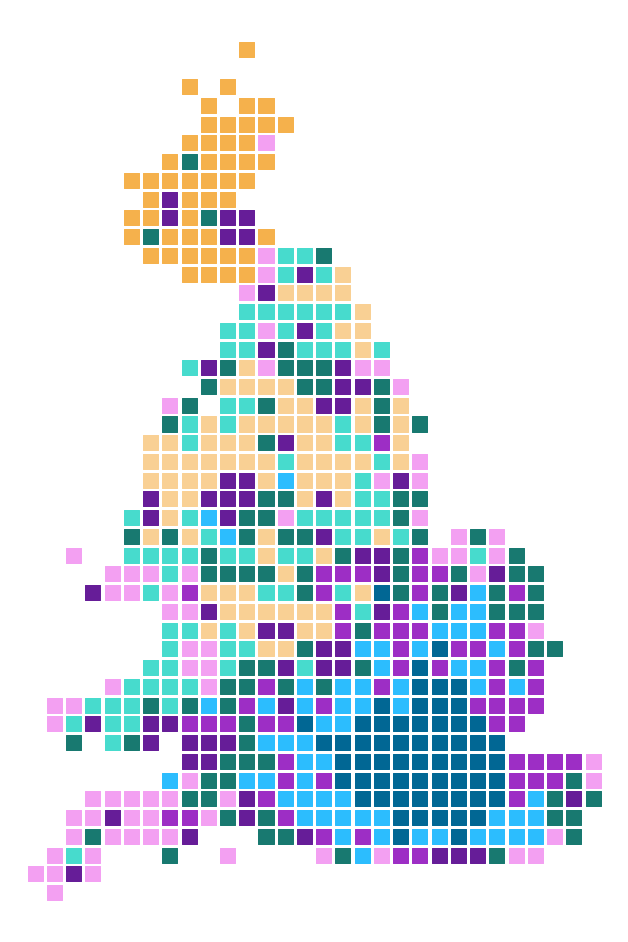

In [378]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

#### PCA

In [379]:
# BIC for GMM
### Using Bayesian information criterion score for Gaussian Mixture Modelling 
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(PCA_df_gb)
        score.append((cov,n_comp,gmm.bic(PCA_df_gb)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
89,full,3,40253.602784


In [380]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_c = calinski_harabasz_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
28,tied,2,179.133433


In [381]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_c = silhouette_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Silhouette_Score
28,tied,2,0.429517


In [383]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(PCA_df_gb)
        model_2 = model.predict(PCA_df_gb)
        score_c = davies_bouldin_score(PCA_df_gb, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin']
score_2 = score_1[score_1.Davies_Bouldin == score_1.Davies_Bouldin.min()]
score_2.head(n=5)

,Covariance_Type,N_Components,Davies_Bouldin
28,tied,2,1.232684


#### Clustering Analysis

In [389]:
# The majority for three metrics out of 4 is tied covariance and 2 components but the component number is too low hence we will
# go with the BIC score of full covariance and 3 components

In [386]:
# Finally BIC Score of 3 Clusters and full covariance
model = GaussianMixture(n_components= 3,covariance_type= "full", random_state = 12)
# fit the model
model.fit(PCA_df_gb)
# assign a cluster to each example
yhat = model.predict(PCA_df_gb)
# retrieve unique clusters
clusters = unique(yhat)


db_preds_gb = []
#Store the predicted labels
db_preds_gb.append(yhat)


gb_cluster_yg = pd.concat([y19_st_gb,
                           pd.DataFrame(db_preds_gb[0], 
                                        index=y17_st_gb.index,
                                        columns=['Cluster'])],
                           axis=1)

gb_cluster_yg_pivot = pd.pivot_table(data = gb_cluster_yg,
                                     index='seat_types_yg',
                                     columns='Cluster',
                                     aggfunc=len,
                                     fill_value=0)

gb_cluster_yg_pivot

Cluster,0,1,2
seat_types_yg,,,
con lab marginal,51,49,47
con ld marginal,3,4,15
con pc marginal,0,1,0
con safe,9,100,150
con snp marginal,0,20,0
green safe,0,0,1
lab ld marginal,0,0,1
lab safe,84,31,20
lab snp marginal,0,10,0


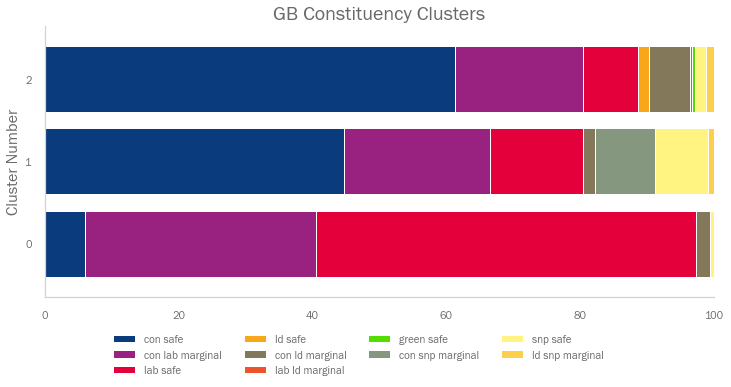

In [387]:
gb_cluster_yg_pivot=gb_cluster_yg_pivot.reindex(party_list)

gb_cluster_bar = (gb_cluster_yg_pivot / gb_cluster_yg_pivot.sum()).T.sort_values(by=['con safe', 'lab safe'], 
                                                                                 ascending=True)

gb_cluster_bar.plot.barh(stacked=True,
                          figsize=(12,5),
                          width=0.8,
                          color=party_colors)

plt.xticks(ticks = np.arange(0,1.2,0.2), labels = np.arange(0,120,20))
plt.xlim(0,1);

plt.title('GB Constituency Clusters');
plt.ylabel('Cluster Number')

plt.legend(bbox_to_anchor=(0.85, -0.1),
           ncol=4,
           frameon=False);

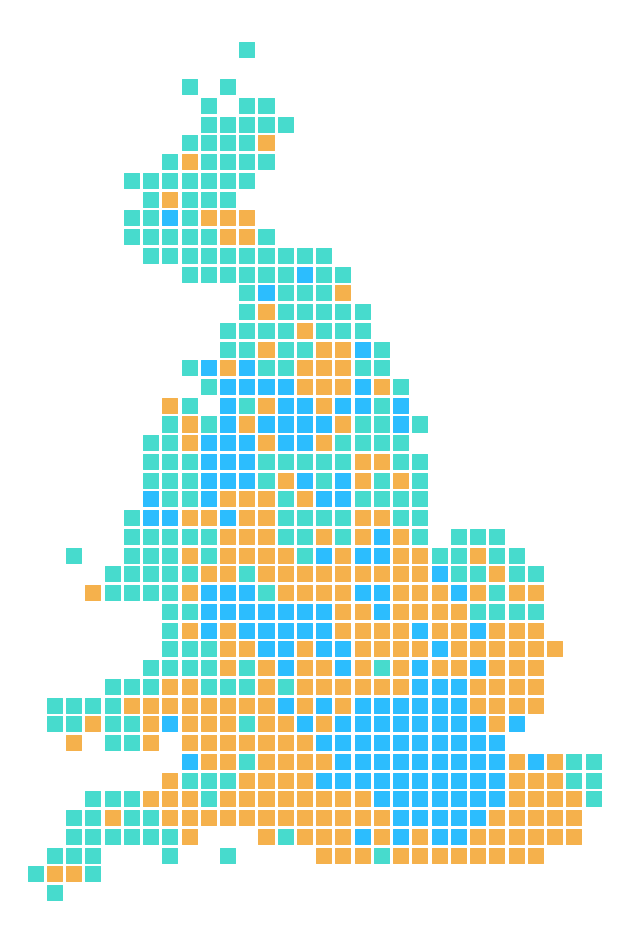

In [388]:
gb_cluster_yg['Colors'] = gb_cluster_yg['Cluster'].map(
    lambda x: color_list[x])

kpi_map('Population',
        colors=gb_cluster_yg[['Colors']],
        data=pd.read_csv('data_with_targets.csv').set_index('ID'),
        exc_color='#ffffff',
        exclude=['Northern Ireland'],
        width=11)

## Final Insights & Discussion

## Conclusion